## Kolmogorov Smirnov Test

In Kolmogorov–Smirnov test The largest difference between the two cumulative distributions is returned after comparison.
Kolmogorov–Smirnov is non-parametric test which means we don't need to test any assumption related to the distribution of data.
Null hypothesis states null both cumulative distributions are similar.If the null hypothesis is rejected, then cumulative distributions different.

When comparing the cumulative distribution of events and non-events, KS is the point at which the disparity between the two distributions is at its greatest. Simply said, it aids in our comprehension of how well our predictive model can distinguish between events and non-events.

In [52]:
import pandas as pd
import numpy as np
dataframe = pd.read_csv(r"C:\Users\neela\Desktop\Data.csv")
dataframe

,Premiums,P(smoker),P(exercise)
0,1,0.000685,0.499943
1,1,0.002333,0.502201
2,1,0.002575,0.499328
3,1,0.002989,0.502783
4,1,0.003322,0.498667
...,...,...,...
321,0,0.986388,0.137336
322,0,0.988588,0.100772
323,0,0.991290,0.174785
324,0,0.992464,0.143333


In [53]:
def ks(data=None,target=None, prob=None):
    data['target0'] = 1 - data[target]
    data['bucket'] = pd.qcut(data[prob], 10)
    grouped = data.groupby('bucket', as_index = False)
    ks_table = pd.DataFrame()
    ks_table['min_prob'] = grouped.min()[prob]
    ks_table['max_prob'] = grouped.max()[prob]
    ks_table['events']   = grouped.sum()[target]
    ks_table['nonevents'] = grouped.sum()['target0']
    ks_table = ks_table.sort_values(by="min_prob", ascending=False).reset_index(drop = True)
    ks_table['event_rate'] = (ks_table.events / data[target].sum()).apply('{0:.2%}'.format)
    ks_table['nonevent_rate'] = (ks_table.nonevents / data['target0'].sum()).apply('{0:.2%}'.format)
    ks_table['cumulative_eventrate']=(ks_table.events / data[target].sum()).cumsum()
    ks_table['cumulative_noneventrate']=(ks_table.nonevents / data['target0'].sum()).cumsum()
    ks_table['KS'] = np.round(ks_table['cumulative_eventrate']-ks_table['cumulative_noneventrate'], 3) * 100
    
    
    #Formating
    ks_table['cumulative_eventrate']= ks_table['cumulative_eventrate'].apply('{0:.2%}'.format) 
    ks_table['cumulative_noneventrate']= ks_table['cumulative_noneventrate'].apply('{0:.2%}'.format)
    ks_table.index = range(1,11)
    ks_table.index.rename('Decile', inplace=True)
    pd.set_option('display.max_columns', 9)
    print(ks_table)
    
    #Display KS
   
    print( "KS is " + str(max(ks_table['KS']))+"%"+ " at decile " + str((ks_table.index[ks_table['KS']==max(ks_table['KS'])][0])))
    return(ks_table)


In [54]:
mydataframe = ks(data=dataframe,target="Premiums", prob="P(exercise)")

        min_prob  max_prob  events  nonevents event_rate nonevent_rate  \
Decile                                                                   
1       0.538233  0.579184      33          0     20.12%         0.00%   
2       0.508758  0.536942      32          0     19.51%         0.00%   
3       0.493356  0.507229      33          0     20.12%         0.00%   
4       0.461287  0.493152      32          0     19.51%         0.00%   
5       0.361936  0.460606      33          0     20.12%         0.00%   
6       0.140959  0.356418       1         31      0.61%        19.14%   
7       0.120261  0.139491       0         33      0.00%        20.37%   
8       0.101150  0.120001       0         32      0.00%        19.75%   
9       0.078496  0.100772       0         33      0.00%        20.37%   
10      0.014030  0.077623       0         33      0.00%        20.37%   

       cumulative_eventrate cumulative_noneventrate    KS  
Decile                                             

In [55]:
mydataframe = ks(data=dataframe,target="Premiums", prob="P(smoker)")

        min_prob  max_prob  events  nonevents event_rate nonevent_rate  \
Decile                                                                   
1       0.931188  0.994598       0         33      0.00%        20.37%   
2       0.855529  0.924169       0         32      0.00%        19.75%   
3       0.783407  0.854770       0         33      0.00%        20.37%   
4       0.734479  0.781539       0         32      0.00%        19.75%   
5       0.333634  0.730062       1         32      0.61%        19.75%   
6       0.247565  0.331046      32          0     19.51%         0.00%   
7       0.178224  0.246641      33          0     20.12%         0.00%   
8       0.120499  0.176714      32          0     19.51%         0.00%   
9       0.056544  0.120247      33          0     20.12%         0.00%   
10      0.000685  0.049400      33          0     20.12%         0.00%   

       cumulative_eventrate cumulative_noneventrate    KS  
Decile                                             

In [56]:
ks_table1 = mydataframe.copy()

In [57]:
ks_table1

,min_prob,max_prob,events,nonevents,event_rate,nonevent_rate,cumulative_eventrate,cumulative_noneventrate,KS
Decile,,,,,,,,,
1,0.931188,0.994598,0,33,0.00%,20.37%,0.00%,20.37%,-20.4
2,0.855529,0.924169,0,32,0.00%,19.75%,0.00%,40.12%,-40.1
3,0.783407,0.854770,0,33,0.00%,20.37%,0.00%,60.49%,-60.5
4,0.734479,0.781539,0,32,0.00%,19.75%,0.00%,80.25%,-80.2
5,0.333634,0.730062,1,32,0.61%,19.75%,0.61%,100.00%,-99.4
6,0.247565,0.331046,32,0,19.51%,0.00%,20.12%,100.00%,-79.9
7,0.178224,0.246641,33,0,20.12%,0.00%,40.24%,100.00%,-59.8
8,0.120499,0.176714,32,0,19.51%,0.00%,59.76%,100.00%,-40.2
9,0.056544,0.120247,33,0,20.12%,0.00%,79.88%,100.00%,-20.1


## Gains Chart

In [60]:
ks_table1['default_cum%_test'] = np.round(((ks_table1['events'] / ks_table1['events'].sum()).cumsum()), 4) * 100
ks_table1['default_cum%_train'] = np.round(((ks_table1['nonevents'] / ks_table1['nonevents'].sum()).cumsum()), 4) * 100
ks_table1

,min_prob,max_prob,events,nonevents,...,cumulative_noneventrate,KS,default_cum%_test,default_cum%_train
Decile,,,,,,,,,
1,0.931188,0.994598,0,33,...,20.37%,-20.4,0.00,20.37
2,0.855529,0.924169,0,32,...,40.12%,-40.1,0.00,40.12
3,0.783407,0.854770,0,33,...,60.49%,-60.5,0.00,60.49
4,0.734479,0.781539,0,32,...,80.25%,-80.2,0.00,80.25
5,0.333634,0.730062,1,32,...,100.00%,-99.4,0.61,100.00
6,0.247565,0.331046,32,0,...,100.00%,-79.9,20.12,100.00
7,0.178224,0.246641,33,0,...,100.00%,-59.8,40.24,100.00
8,0.120499,0.176714,32,0,...,100.00%,-40.2,59.76,100.00
9,0.056544,0.120247,33,0,...,100.00%,-20.1,79.88,100.00


In [42]:
ks_table2 = ks_table1[['default_cum%_test']]
ks_table2.reset_index()

,Decile,default_cum%_test
0,1,0.00
1,2,0.00
2,3,0.00
3,4,0.00
4,5,0.61
5,6,20.12
6,7,40.24
7,8,59.76
8,9,79.88
9,10,100.00


In [43]:
ks_table3 = ks_table1[['default_cum%_train']]
ks_table3.reset_index()
ks_table4 = ks_table3.copy()
ks_table4['Base %'] = [10,20,30,40,50,60,70,80,90,100]
ks_table4

,default_cum%_train,Base %
Decile,,
1,20.37,10
2,40.12,20
3,60.49,30
4,80.25,40
5,100.00,50
6,100.00,60
7,100.00,70
8,100.00,80
9,100.00,90


In [44]:
final = pd.concat([ks_table4,ks_table2],axis=1)
final

,default_cum%_train,Base %,default_cum%_test
Decile,,,
1,20.37,10,0.00
2,40.12,20,0.00
3,60.49,30,0.00
4,80.25,40,0.00
5,100.00,50,0.61
6,100.00,60,20.12
7,100.00,70,40.24
8,100.00,80,59.76
9,100.00,90,79.88


Text(0.5, 1.0, 'Gains Chart')

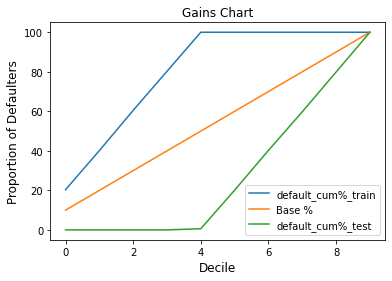

In [45]:
gains_chart = final.plot(kind='line',use_index=False)
gains_chart.set_ylabel("Proportion of Defaulters",fontsize=12)
gains_chart.set_xlabel("Decile",fontsize=12)
gains_chart.set_title("Gains Chart")

## Lift Chart


In [46]:
final2 = final.copy()
final2['lift_train'] = (final['default_cum%_train']/final['Base %'])
final2['lift_test'] = (final['default_cum%_test']/final['Base %'])
final2['Baseline']  = [1,1,1,1,1,1,1,1,1,1]
final2

,default_cum%_train,Base %,default_cum%_test,lift_train,lift_test,Baseline
Decile,,,,,,
1,20.37,10,0.00,2.037000,0.000000,1
2,40.12,20,0.00,2.006000,0.000000,1
3,60.49,30,0.00,2.016333,0.000000,1
4,80.25,40,0.00,2.006250,0.000000,1
5,100.00,50,0.61,2.000000,0.012200,1
6,100.00,60,20.12,1.666667,0.335333,1
7,100.00,70,40.24,1.428571,0.574857,1
8,100.00,80,59.76,1.250000,0.747000,1
9,100.00,90,79.88,1.111111,0.887556,1


In [48]:
lift_chart = final2[['lift_train','lift_test','Baseline']]
lift_chart

,lift_train,lift_test,Baseline
Decile,,,
1,2.037000,0.000000,1
2,2.006000,0.000000,1
3,2.016333,0.000000,1
4,2.006250,0.000000,1
5,2.000000,0.012200,1
6,1.666667,0.335333,1
7,1.428571,0.574857,1
8,1.250000,0.747000,1
9,1.111111,0.887556,1


(0.0, 2.0)

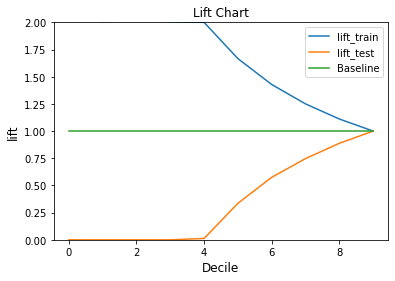

In [50]:
lift_chart1 = lift_chart.plot(kind='line',use_index=False)
lift_chart1.set_ylabel("lift",fontsize=12)
lift_chart1.set_xlabel("Decile",fontsize=12)
lift_chart1.set_title("Lift Chart")
lift_chart1.set_ylim(0.0,2)